# Multiple Linear Regresssion


It is the simplest regression technique where multiple features (say $n$) are used to predict a  continuous numerical target variable $y^{(i)}$ while minimizing a cost function.

The given exercise aims to implement this model from scratch, without using libraries like SciKit-Learn

The model aims to determine a linear relationship of the type $\hat{y}^{(i)} = \theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)}$ where i is an integer from 1 to m, indicating an m - instance dataset. 
$\mathbf{\theta} = \begin{bmatrix} \theta_0\\\theta_1\\\theta_2\\\cdots\\\theta_n \end{bmatrix}_{n\times1}$ 
The loss function tried to minimize is the Mean Squared Error, given by : 
$$J = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2 = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})^2$$


There are multiple ways to implement the model, the famous ones are a)solving the closed form equation b)Gradient Descent. The method we have used is Batch Gradient Descent. Here the entire dataset is used for each iteration, which makes it slower but still faster than solving the normal equation (requires calculating pseuodo inverse)

Gradient Descent iteratively arrives at the solution. It starts by randomly initializing the parameter vector $\mathbf{\theta}$ (Here, we have taken all of them to be 0's).
Then it calculates the error $\hat{y}^{(i)} - y^{(i)}$ for each iteration $'i'$, then multplies the error with the value of the respective feature to get $\frac{\partial J}{\partial \mathbf{\theta}} = \nabla_{\mathbf{\theta}}J$ given by:
$$\frac{\partial J}{\partial \mathbf{\theta}} = \frac{1}{m}\begin{bmatrix} \sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_1^{(i)}\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_2^{(i)}\\\cdots\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_n^{(i)}\end{bmatrix}_{n\times1} $$

Using the given expression it calculates the updated parameters using the equation : 
$$\begin{aligned} \mathbf{\theta}^{new} &= \mathbf{\theta}^{old} - \alpha\nabla_{\mathbf{\theta}}J\Big|_{\mathbf{\theta} = \mathbf{\theta}^{old}}\\ \begin{bmatrix} \theta_0\\\theta_1\\\theta_2\\\cdots\\\theta_n \end{bmatrix}_{n\times1}^{new} &= \begin{bmatrix} \theta_0\\\theta_1\\\theta_2\\\cdots\\\theta_n \end{bmatrix}_{n\times1}^{old} - \frac{\alpha}{m}\begin{bmatrix} \sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_1^{(i)}\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_2^{(i)}\\\cdots\\\sum_{i=1}^{m}(\theta_0 + \theta_1 x_1^{(i)}+...+ \theta_n x_n^{(i)} - y^{(i)})x_n^{(i)}\end{bmatrix}_{n\times1}\Bigg|_{\mathbf{\theta} = \mathbf{\theta}^{old}}\end{aligned}$$

Here, $\alpha$ is the learning rate. A higher learning rate means that the step towards the solution are large, while a smaller $\alpha$ ensures that these steps are small. The former might lead to the model never converging, while the latter might take more time to converge


What are we trying to find a solution of? We are trying to minimize the MSE, hence we need to arrive at its global minima. So, we are trying to find the solution of $\frac{\partial L}{\partial \mathbf{\theta}} = 0$

### **Convergence Proof of Batch Gradient Descent for Multiple Linear Regression**

#### **1. Problem Definition**
Consider the linear regression model:  
$ y = X \theta^* + \epsilon $  
where:  
- $ y \in \mathbb{R}^n $ is the response vector,  
- $ X \in \mathbb{R}^{n \times d} $ is the design matrix (with $ n $ samples and $ d $ features),  
- $ \theta^* \in \mathbb{R}^d $ is the true parameter vector,  
- $ \epsilon \in \mathbb{R}^n $ is the noise vector with $ \mathbb{E}[\epsilon] = 0 $.  

The **MSE loss** is:  
$$ J(\theta) = \frac{1}{2n} \| X \theta - y \|_2^2 $$
The gradient of $ J(\theta) $ is:  
$$ \nabla J(\theta) = \frac{1}{n} X^T (X \theta - y) $$  

#### **2. Assumptions**
1. **Convexity**: $ J(\theta) $ is convex since $ X^T X $ is positive semidefinite.  
2. **Lipschitz Smoothness**: $ \nabla J(\theta) $ is Lipschitz continuous with constant $ L = \lambda_{\text{max}}(X^T X)/n $, meaning:  
   $$ \| \nabla J(\theta_1) - \nabla J(\theta_2) \| \leq L \| \theta_1 - \theta_2 \| \quad \forall \theta_1, \theta_2 $$  
3. **Learning Rate Condition**: The step size $ \alpha $ satisfies $ 0 < \alpha \leq \frac{1}{L} $.  

#### **3. Key Lemmas**
**Lemma 1 (Quadratic Upper Bound)**  
For an $ L $-smooth function $ J(\theta) $, the following inequality holds:  
$$ J(\theta_{k+1}) \leq J(\theta_k) + \langle \nabla J(\theta_k), \theta_{k+1} - \theta_k \rangle + \frac{L}{2} \| \theta_{k+1} - \theta_k \|^2 $$  

**Proof**:  
By Taylor expansion and Lipschitz continuity of $ \nabla J(\theta) $.  

**Lemma 2 (Descent Lemma)**  
If $ \alpha \leq \frac{1}{L} $, then:  
$$ J(\theta_{k+1}) \leq J(\theta_k) - \frac{\alpha}{2} \| \nabla J(\theta_k) \|^2 $$  

**Proof**:  
Substitute the BGD update $ \theta_{k+1} = \theta_k - \alpha \nabla J(\theta_k) $ into Lemma 1.  

#### **4. Main Convergence Theorem**
**Theorem (Convergence of BGD for MSE)**  
Under Assumptions 1-3, Batch Gradient Descent converges to the global minimum $ \theta^* $, and the following holds:  
1. **Monotonic Decrease**: $ J(\theta_{k+1}) \leq J(\theta_k) $.  
2. **Gradient Vanishing**: $ \lim_{k \to \infty} \nabla J(\theta_k) = 0 $.  
3. **Convergence Rate**:  
   - If $ J(\theta) $ is strongly convex (i.e., $ X^T X $ is full rank), convergence is linear:  
     $$ \| \theta_k - \theta^* \| \leq \rho^k \| \theta_0 - \theta^* \|$$ 
     where $$ \rho = \max \{ |1 - \alpha \lambda_{\text{min}}|, |1 - \alpha \lambda_{\text{max}}| \} < 1 $$
   - Otherwise, the worst-case rate is sublinear:  
     $$ J(\theta_k) - J(\theta^*) \leq \frac{C}{k} $$  
     for some constant $$ C > 0 $$  

**Proof**:  
1. **Monotonicity**: Follows directly from Lemma 2.  
2. **Gradient Vanishing**: Summing Lemma 2 over $ k $ gives:  
   $$ \sum_{k=0}^\infty \| \nabla J(\theta_k) \|^2 \leq \frac{2}{\alpha} (J(\theta_0) - J(\theta^*)) < \infty $$  
   Hence, $$ \| \nabla J(\theta_k) \| \to 0 $$
3. **Rate Analysis**:  
   - For strongly convex $ J(\theta) $, use the Polyak-Łojasiewicz inequality.  
   - For general convex case, telescope the descent inequality.  

#### **5. Conclusion**
Batch Gradient Descent **converges** to the global minimum of the MSE objective for linear regression when:  
- The learning rate $ \alpha \leq 1/L $,  
- The loss is convex (guaranteed for MSE),  
- The convergence rate depends on the strong convexity of $ J(\theta) $.  


#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

#### Importing the dataset, Shuffling, selecting input features and targe


In [2]:
dataset = pd.read_csv("train_energy_data.csv")
dataset = dataset.sample(frac=1)

# Select features and target
display(dataset[:5])
print(pd.unique(dataset['Building Type']))
print(pd.unique(dataset['Day of Week']))
features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Building Type", "Day of Week"]
x = dataset[features]
y = dataset.drop(features, axis=1)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
383,Commercial,47266,14,39,14.13,Weekend,5212.64
20,Commercial,37912,24,43,10.38,Weekday,4993.70
237,Commercial,23411,98,23,20.50,Weekday,4558.07
910,Residential,35701,19,17,29.90,Weekend,3665.55
202,Industrial,7283,88,44,19.54,Weekday,4576.47


['Commercial' 'Residential' 'Industrial']
['Weekend' 'Weekday']


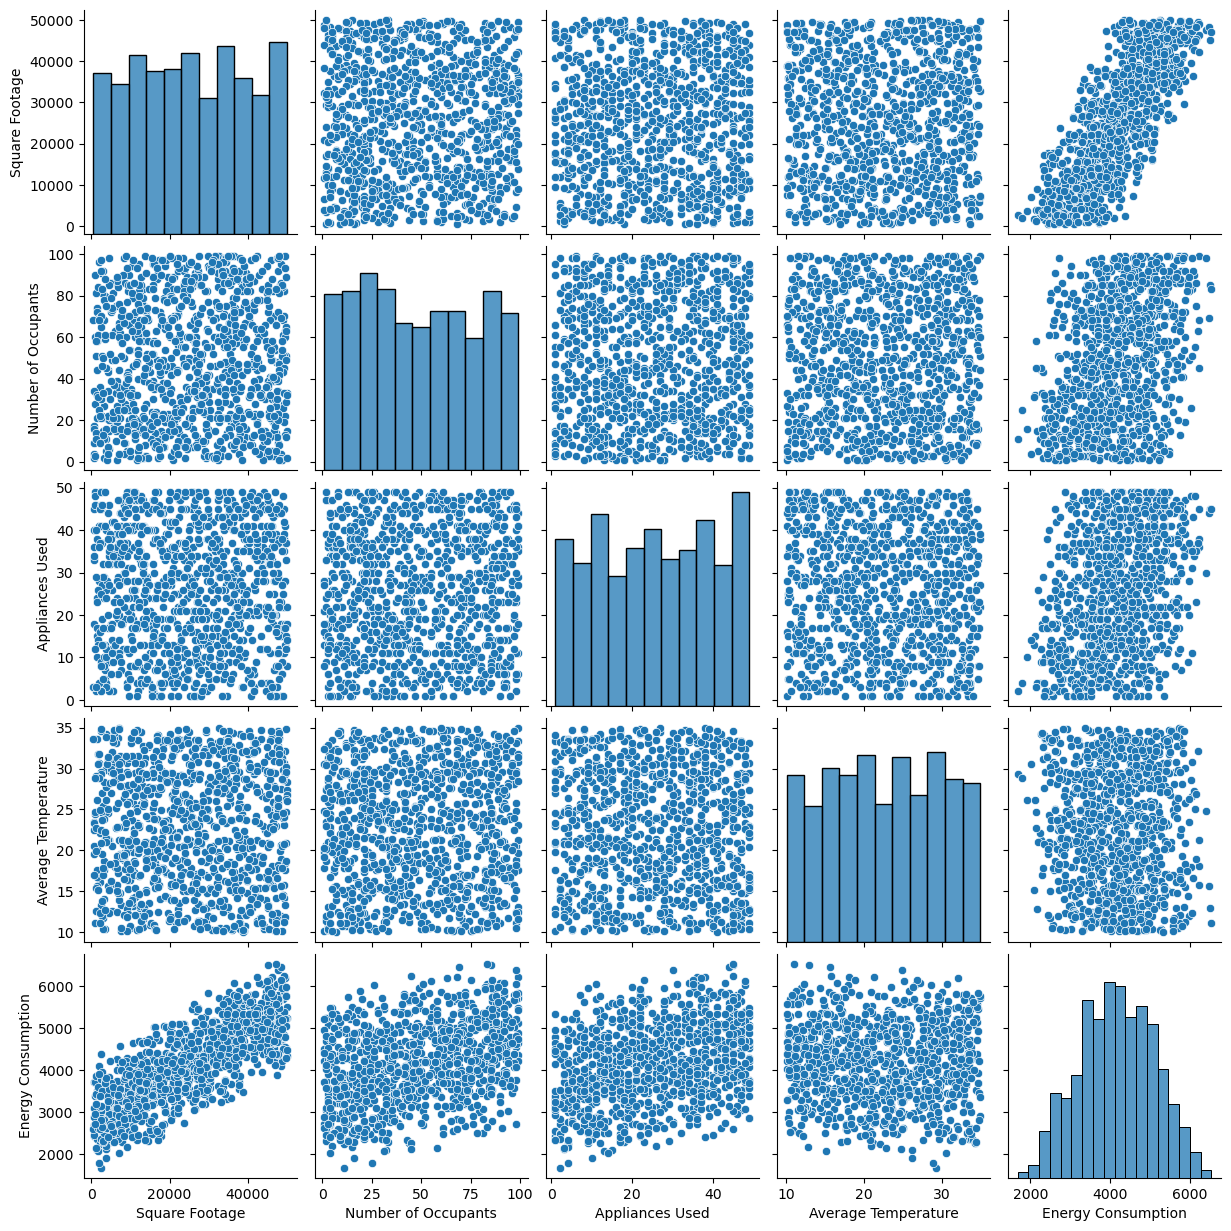

In [3]:
sns.pairplot(dataset)
plt.show()

#### Converting categorical feature to numeric feature and normalizing

In [4]:
x['weekday'] = x['Day of Week'].apply(lambda i: 1 if i == 'Weekday' else 0)
x['weekend'] = x['Day of Week'].apply(lambda i: 1 if i == 'Weekend' else 0)

x['Residential'] = x['Building Type'].apply(lambda i: 1 if i=='Residential' else 0)
x['Commercial'] = x['Building Type'].apply(lambda i: 1 if i=='Commercial' else 0)
x['Industrial'] = x['Building Type'].apply(lambda i: 1 if i=='Industrial' else 0)

x.drop(columns=['Building Type','Day of Week'], inplace = True)

#Normalize features
numerical_features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature"]
minval = [0,0,0,0]
maxval = [0,0,0,0]
for index, i in enumerate(numerical_features):
    minval[index] = x[i].min()
    maxval[index] = x[i].max()
    x[i] = (x[i]-minval[index])/(maxval[index] - minval[index])

print(x.head())
x = np.array(x)
y=np.array(y)

     Square Footage  Number of Occupants  Appliances Used  \
383        0.944758             0.132653         0.791667   
20         0.755547             0.234694         0.875000   
237        0.462225             0.989796         0.458333   
910        0.710824             0.183673         0.333333   
202        0.135991             0.887755         0.895833   

     Average Temperature  weekday  weekend  Residential  Commercial  \
383             0.163593        0        1            0           1   
20              0.013232        1        0            0           1   
237             0.419006        1        0            0           1   
910             0.795910        0        1            1           0   
202             0.380513        1        0            0           0   

     Industrial  
383           0  
20            0  
237           0  
910           0  
202           1  


In [5]:
x = np.insert(x, 0, 1, axis=1)
print(x.shape)
print(x[:5])
#inserted for multiplication with bias term

(1000, 10)
[[1.         0.94475797 0.13265306 0.79166667 0.16359262 0.
  1.         0.         1.         0.        ]
 [1.         0.75554746 0.23469388 0.875      0.01323176 1.
  0.         0.         1.         0.        ]
 [1.         0.46222465 0.98979592 0.45833333 0.41900561 1.
  0.         0.         1.         0.        ]
 [1.         0.71082388 0.18367347 0.33333333 0.79591018 0.
  1.         1.         0.         0.        ]
 [1.         0.13599126 0.8877551  0.89583333 0.38051323 1.
  0.         0.         0.         1.        ]]


#### Equation used : 
$$ \hat{y} = \begin{bmatrix} 1\;x_1^{(i)}\;x_2^{(i)}\; \cdots \;x_n^{(i)} \end{bmatrix} \cdot \begin{bmatrix} \theta_0\\\theta_1\\\theta_2\\\cdots\\\theta_n \end{bmatrix} = \theta_0 + \theta_1x_1^{(i)}+\cdots+\theta_n x_n^{(i)}

In [6]:
beta = np.zeros((x.shape[1], 1))
alpha=0.01
m=x.shape[0]
loss = 0
prev_loss = np.float64(10000)
while(abs(prev_loss-loss) > 0.1):
    prev_loss = loss
    loss = 0
    derivative = 0
    for (i,j) in zip(x,y):
        yhat = i@beta
        error = yhat-j
        loss += (error)**2
        derivative += np.array([error, error*i[1], error*i[2],
                                error*i[3],error*i[4],error*i[5], error*i[6], error*i[7], 
                                error*i[8], error*i[9]]).reshape(-1,1)
    beta -=(alpha/m)*derivative
    loss = (2/m)*loss
    print(loss)
    print(prev_loss)
    print('\n')


[36455725.3601286]
0


[34447554.89626712]
[36455725.3601286]


[32552765.41071749]
[34447554.89626712]


[30764946.14637131]
[32552765.41071749]


[29078048.86821745]
[30764946.14637131]


[27486367.36278209]
[29078048.86821745]


[25984518.09687335]
[27486367.36278209]


[24567421.97007212]
[25984518.09687335]


[23230287.09911824]
[24567421.97007212]


[21968592.57583798]
[23230287.09911824]


[20778073.14355902]
[21968592.57583798]


[19654704.74007339]
[20778073.14355902]


[18594690.85814397]
[19654704.74007339]


[17594449.67732337]
[18594690.85814397]


[16650601.92346727]
[17594449.67732337]


[15759959.41479113]
[16650601.92346727]


[14919514.25564614]
[15759959.41479113]


[14126428.64138648]
[14919514.25564614]


[13378025.23976993]
[14126428.64138648]


[12671778.11628962]
[13378025.23976993]


[12005304.17267741]
[12671778.11628962]


[11376355.06955863]
[12005304.17267741]


[10782809.60588047]
[11376355.06955863]


[10222666.52928247]
[10782809.60588047]


[9694037.753

In [7]:
beta

array([[1119.06664648],
       [2453.52916545],
       [ 973.69797391],
       [ 951.09428665],
       [-127.58547179],
       [ 584.46061862],
       [ 534.60602786],
       [-126.9902225 ],
       [ 372.48635971],
       [ 873.57050928]])

# Interpreting Results

In [8]:
y_pred = [x[i]@beta for i in range(0, x.shape[0])]
y_pred = np.array(y_pred)

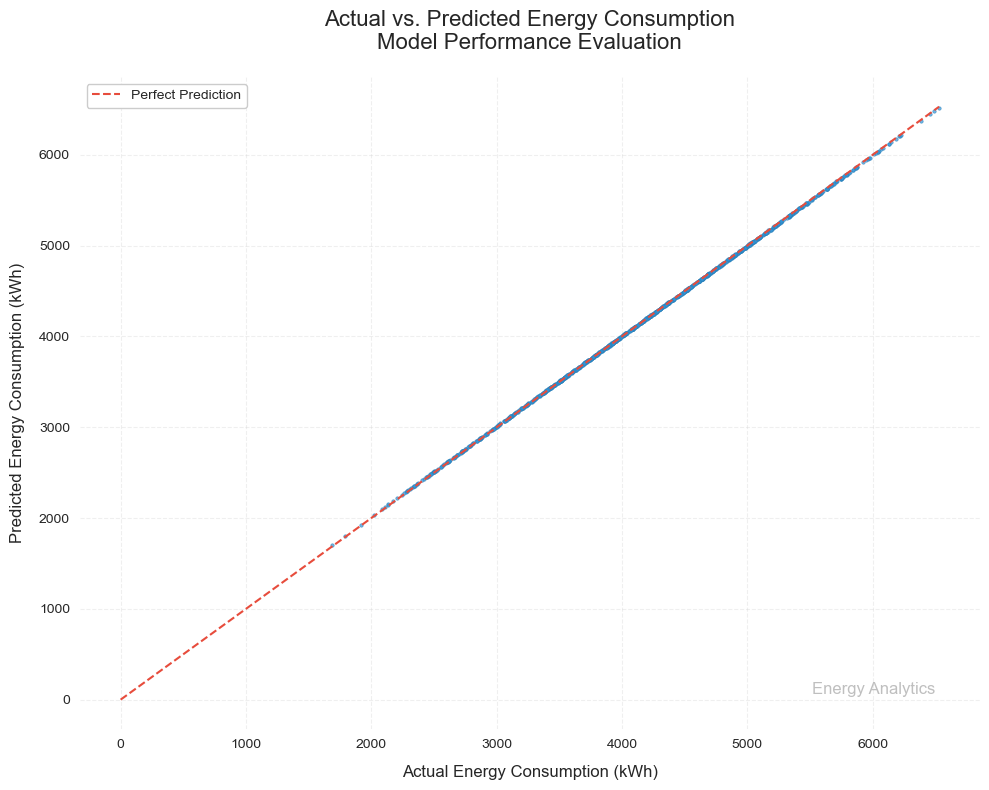

In [9]:
y_actual = np.array(y).flatten()
y_pred = np.array(y_pred).flatten()

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})

scatter = sns.scatterplot(
    x=y_actual, 
    y=y_pred,
    alpha=0.7,           
    s=6,                
    color='#3498db',    
    edgecolor='#2980b9', 
    linewidth=0.5        
)

max_val = max(np.max(y_actual), np.max(y_pred))
plt.plot([0, max_val], [0, max_val], 
         color='#e74c3c',  
         linestyle='--', 
         linewidth=1.5,
         label='Perfect Prediction')

plt.title('Actual vs. Predicted Energy Consumption\nModel Performance Evaluation', 
          fontsize=16, pad=20)
plt.xlabel('Actual Energy Consumption (kWh)', 
           fontsize=12, labelpad=10)
plt.ylabel('Predicted Energy Consumption (kWh)', 
           fontsize=12, labelpad=10)


plt.legend(fontsize=10, framealpha=1)


plt.grid(True, alpha=0.3)
plt.tight_layout()

sns.despine(left=True, bottom=True)


plt.text(0.95, 0.05, 'Energy Analytics',
         fontsize=12, color='gray',
         ha='right', va='bottom', alpha=0.5,
         transform=plt.gca().transAxes)

plt.show()

# Testing

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
97,Commercial,1558,27,29,16.86,Weekend,2843.60
73,Commercial,26715,27,46,13.11,Weekday,4510.20
1,Commercial,27583,56,23,23.07,Weekend,4283.80
32,Commercial,49354,84,38,15.03,Weekday,6042.56
86,Industrial,19750,80,39,20.28,Weekday,5016.11


['Commercial' 'Industrial' 'Residential']
['Weekend' 'Weekday']
(100, 10)
[[1.         0.02018731 0.26530612 0.58333333 0.27305533 0.
  1.         0.         1.         0.        ]
 [1.         0.52905718 0.26530612 0.9375     0.12269447 1.
  0.         0.         1.         0.        ]
 [1.         0.54661488 0.56122449 0.45833333 0.52205293 0.
  1.         0.         1.         0.        ]
 [1.         0.98699355 0.84693878 0.77083333 0.19967923 1.
  0.         0.         1.         0.        ]
 [1.         0.3881708  0.80612245 0.79166667 0.41018444 1.
  0.         0.         0.         1.        ]]


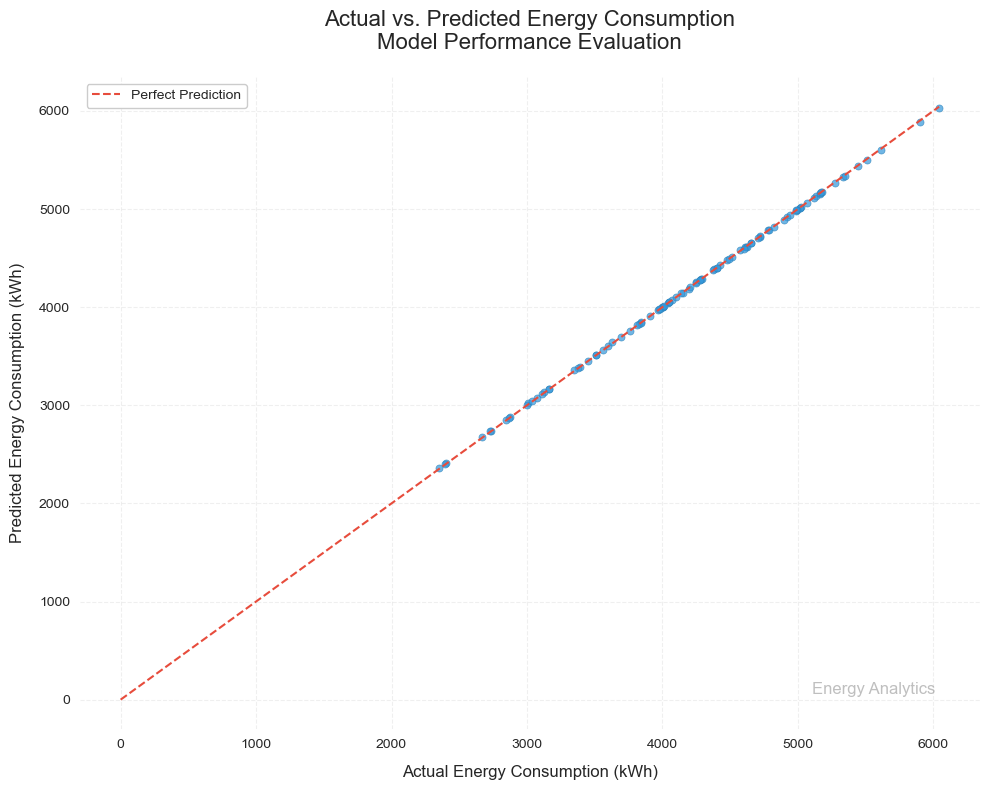

In [10]:
test=pd.read_csv("test_energy_data.csv")
test = test.sample(frac=1)

# Select features and target
display(test[:5])
print(pd.unique(test['Building Type']))
print(pd.unique(test['Day of Week']))
features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature", "Building Type", "Day of Week"]
x_test = test[features]
y_test = test.drop(features, axis=1)
x_test['weekday'] = x_test['Day of Week'].apply(lambda i: 1 if i == 'Weekday' else 0)
x_test['weekend'] = x_test['Day of Week'].apply(lambda i: 1 if i == 'Weekend' else 0)

x_test['Residential'] = x_test['Building Type'].apply(lambda i: 1 if i=='Residential' else 0)
x_test['Commercial'] = x_test['Building Type'].apply(lambda i: 1 if i=='Commercial' else 0)
x_test['Industrial'] = x_test['Building Type'].apply(lambda i: 1 if i=='Industrial' else 0)

x_test.drop(columns=['Building Type','Day of Week'], inplace = True)

#Normalize features
numerical_features = ["Square Footage", "Number of Occupants", "Appliances Used", "Average Temperature"]
for index, i in enumerate(numerical_features):
    x_test[i] = (x_test[i]-minval[index])/(maxval[index] - minval[index])



x_test = np.array(x_test)
y_test=np.array(y_test)
x_test = np.insert(x_test, 0, 1, axis=1)
print(x_test.shape)
print(x_test[:5])

y_test_pred = np.array([x_test[i]@beta for i in range(0, x_test.shape[0])])

y_test = np.array(y_test).flatten()
y_test_pred = np.array(y_test_pred).flatten()

# Create figure with custom style
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.4})


scatter = sns.scatterplot(
    x=y_test, 
    y=y_test_pred,
    alpha=0.7,           
    s=26,                
    color='#3498db',    
    edgecolor='#2980b9', 
    linewidth=0.5       
)


max_val = max(y_test.max(), y_test_pred.max())
plt.plot([0, max_val], [0, max_val], 
         color='#e74c3c', 
         linestyle='--', 
         linewidth=1.5,
         label='Perfect Prediction')


plt.title('Actual vs. Predicted Energy Consumption\nModel Performance Evaluation', 
          fontsize=16, pad=20)
plt.xlabel('Actual Energy Consumption (kWh)', 
           fontsize=12, labelpad=10)
plt.ylabel('Predicted Energy Consumption (kWh)', 
           fontsize=12, labelpad=10)


plt.legend(fontsize=10, framealpha=1)

plt.grid(True, alpha=0.3)
plt.tight_layout()

sns.despine(left=True, bottom=True)

plt.text(0.95, 0.05, 'Energy Analytics',
         fontsize=12, color='gray',
         ha='right', va='bottom', alpha=0.5,
         transform=plt.gca().transAxes)

plt.show()
